In [1]:
using POMDPs
using LaserTag
using ParticleFilters
using POMDPToolbox
using Interact

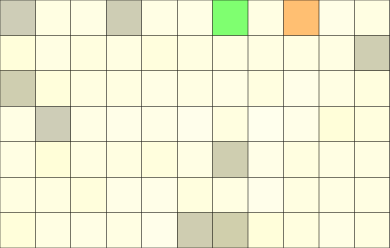

In [2]:
p = gen_lasertag()
filter = SIRParticleFilter(p, 1000)
b = initialize_belief(filter, initial_state_distribution(p))
LaserTagVis(p, s=initial_state(p, Base.GLOBAL_RNG), b=b)

In [3]:
p = gen_lasertag(rng=MersenneTwister(1), reading_std=2.5)
filter = SIRParticleFilter(p, 10000)
policy = RandomPolicy(p, rng=MersenneTwister(2))
hr = HistoryRecorder(max_steps=50, rng=MersenneTwister(3))
hist = simulate(hr, p, policy, filter)
ns = n_steps(hist)-1
#=
@manipulate for i in 1:ns
    s = state_hist(hist)[i+1]
    o = observation_hist(hist)[i]
    a = action_hist(hist)[i+1]
    b = belief_hist(hist)[i+1]
    LaserTagVis(p, s=s, a=a, o=o, b=b)
end
=#

49

In [4]:
i=0

0

In [7]:
i+=1
s = state_hist(hist)[i+1]
o = observation_hist(hist)[i]
a = action_hist(hist)[i+1]
b = belief_hist(hist)[i+1]
r = reward_hist(hist)[i+1]
LaserTagVis(p, s=s, a=a, o=o, b=b, r=r)

LoadError: BoundsError: attempt to access 50-element Array{Int64,1} at index [51]

In [6]:
using Reel
frames = Frames(MIME("image/png"), fps=2)
for i in 1:ns
    s = state_hist(hist)[i+1]
    o = observation_hist(hist)[i]
    a = action_hist(hist)[i+1]
    b = belief_hist(hist)[i+1]
    r = reward_hist(hist)[i+1]
    push!(frames, LaserTagVis(p, s=s, a=a, o=o, b=b, r=r))
    print(".")
end

write("/tmp/lasertag.gif", frames)

.................................................

"/tmp/lasertag.gif"